<a href="https://colab.research.google.com/github/Neel7317/Deep-Learning-/blob/master/StockPredictionLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd

In [19]:
import pandas_datareader as pdr

In [20]:
df=pdr.get_data_tiingo('AAPL',api_key='07c26b4cfb8c9b34291c77fe6f98cfcd152c2e54')

In [21]:
df.to_csv('AAPL.csv')

In [57]:
df=pd.read_csv('AAPL.csv')

In [58]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-02-01 00:00:00+00:00,96.43,96.71,95.40,96.47,40943541,22.332087,22.396932,22.093551,22.341350,163774164,0.00,1.0
1,AAPL,2016-02-02 00:00:00+00:00,94.48,96.04,94.28,95.42,37357215,21.880489,22.241767,21.834171,22.098182,149428860,0.00,1.0
2,AAPL,2016-02-03 00:00:00+00:00,96.35,96.84,94.08,95.00,45964294,22.313560,22.427038,21.787854,22.000915,183857176,0.00,1.0
3,AAPL,2016-02-04 00:00:00+00:00,96.60,97.33,95.19,95.86,46471652,22.491883,22.661853,22.163585,22.319585,185886608,0.52,1.0
4,AAPL,2016-02-05 00:00:00+00:00,94.02,96.92,93.69,96.52,46418064,21.891168,22.566390,21.814333,22.473256,185672256,0.00,1.0


In [59]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2021-01-22 00:00:00+00:00,139.07,139.85,135.02,136.28,114459360,139.07,139.85,135.02,136.28,114459360,0.0,1.0
1254,AAPL,2021-01-25 00:00:00+00:00,142.92,145.09,136.54,143.07,157611713,142.92,145.09,136.54,143.07,157611713,0.0,1.0
1255,AAPL,2021-01-26 00:00:00+00:00,143.16,144.30,141.37,143.60,98390555,143.16,144.30,141.37,143.60,98390555,0.0,1.0
1256,AAPL,2021-01-27 00:00:00+00:00,142.06,144.30,140.41,143.43,140843759,142.06,144.30,140.41,143.43,140843759,0.0,1.0
1257,AAPL,2021-01-28 00:00:00+00:00,137.09,141.99,136.70,139.52,142621128,137.09,141.99,136.70,139.52,142621128,0.0,1.0


In [61]:

df1=df.reset_index()['high']

In [56]:
df1

0        96.71
1        96.04
2        96.84
3        97.33
4        96.92
         ...  
1253    139.85
1254    145.09
1255    144.30
1256    144.30
1257    141.99
Name: high, Length: 1258, dtype: float64

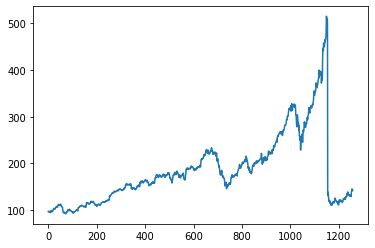

In [62]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [63]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [65]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler=MinMaxScaler(feature_range=(0,1))#scale value between 0 to 1
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))#reshap the value


In [66]:
df1

array([[0.01190167],
       [0.0103195 ],
       [0.01220866],
       ...,
       [0.12428271],
       [0.12428271],
       [0.11882778]])

In [76]:
#splitting data into train and test sample
training_size=int(len(df1)*0.65)
testing_size=df1-training_size

train_data,test_data=df1[0:training_size,:],df1[training_size:,:]

In [77]:
test_data

array([[0.29196873],
       [0.2856873 ],
       [0.28377453],
       [0.2766902 ],
       [0.27333695],
       [0.26842515],
       [0.25978228],
       [0.25309939],
       [0.23097268],
       [0.2314922 ],
       [0.23633315],
       [0.23803339],
       [0.23432593],
       [0.21885848],
       [0.22747774],
       [0.22207004],
       [0.20986138],
       [0.21363969],
       [0.20997946],
       [0.20705127],
       [0.20676789],
       [0.20383971],
       [0.2036744 ],
       [0.20818476],
       [0.2203698 ],
       [0.22150329],
       [0.2367346 ],
       [0.24488157],
       [0.24636928],
       [0.24629844],
       [0.24823482],
       [0.24067821],
       [0.24391338],
       [0.25649987],
       [0.25553168],
       [0.25725553],
       [0.25782228],
       [0.25619288],
       [0.25406758],
       [0.25815288],
       [0.25952252],
       [0.25463433],
       [0.26641793],
       [0.26320637],
       [0.26629986],
       [0.26781118],
       [0.25912107],
       [0.259

In [83]:

# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step),0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [84]:

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [85]:

print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [35]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [87]:
X_train.shape[1]

100

In [88]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [89]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM


In [90]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [91]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [92]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 4s 106ms/step - loss: 0.0149 - val_loss: 0.0493
Epoch 2/100
12/12 [==============================] - 0s 23ms/step - loss: 0.0027 - val_loss: 0.0210
Epoch 3/100
12/12 [==============================] - 0s 19ms/step - loss: 9.8110e-04 - val_loss: 0.0205
Epoch 4/100
12/12 [==============================] - 0s 22ms/step - loss: 5.3699e-04 - val_loss: 0.0230
Epoch 5/100
12/12 [==============================] - 0s 19ms/step - loss: 3.9560e-04 - val_loss: 0.0189
Epoch 6/100
12/12 [==============================] - 0s 20ms/step - loss: 3.1986e-04 - val_loss: 0.0183
Epoch 7/100
12/12 [==============================] - 0s 20ms/step - loss: 2.9519e-04 - val_loss: 0.0181
Epoch 8/100
12/12 [==============================] - 0s 19ms/step - loss: 2.7524e-04 - val_loss: 0.0173
Epoch 9/100
12/12 [==============================] - 0s 19ms/step - loss: 2.9893e-04 - val_loss: 0.0167
Epoch 10/100
12/12 [==============================] - 0s 20ms/step - lo

In [93]:

### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [94]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [95]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.008505198804783927

In [96]:

### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.07857989156691238

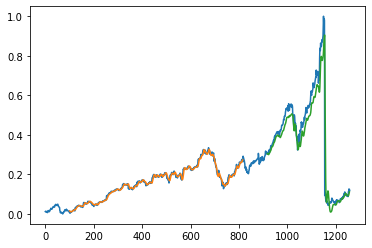

In [97]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [98]:
len(test_data)

441

In [99]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [100]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [101]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


[0.12151939]
101
1 day input [0.06451461 0.06486882 0.06808038 0.05563558 0.05728859 0.06413441
 0.05745389 0.04848041 0.04536331 0.04373391 0.05003896 0.04826788
 0.0438756  0.04904716 0.05584811 0.0558245  0.06042931 0.06151557
 0.05596618 0.05898883 0.05773727 0.05639124 0.05839847 0.05981534
 0.07913193 0.07962784 0.07405483 0.06973339 0.07055518 0.06788911
 0.06449099 0.06384159 0.06227124 0.05875269 0.05875269 0.06047654
 0.05610787 0.05965003 0.04798451 0.04489102 0.04680379 0.0564857
 0.06600231 0.06501051 0.07159893 0.06120859 0.06602593 0.06815123
 0.0661244  0.06923749 0.06849151 0.0664746  0.06467991 0.06399509
 0.0612799  0.05709968 0.05922497 0.06097244 0.06919026 0.07509221
 0.07485772 0.07582591 0.07365528 0.07769145 0.07865965 0.08095024
 0.07603844 0.07341724 0.07481049 0.08555506 0.08666493 0.08952228
 0.08838879 0.08652325 0.10091624 0.09625239 0.09868468 0.10784707
 0.1112688  0.10465913 0.10170732 0.09904267 0.094623   0.09299336
 0.09436324 0.09672468 0.09091553 

In [102]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

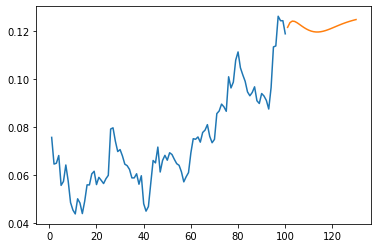

In [103]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

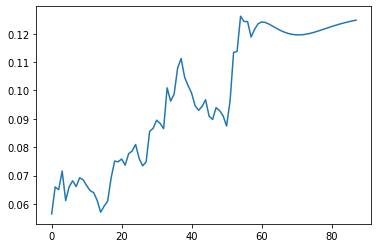

In [104]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [105]:

df3=scaler.inverse_transform(df3).tolist()

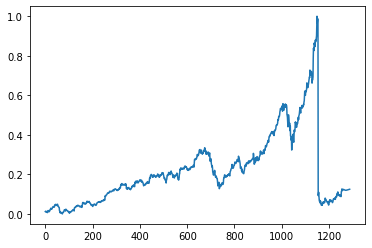

In [106]:

plt.plot(df3)